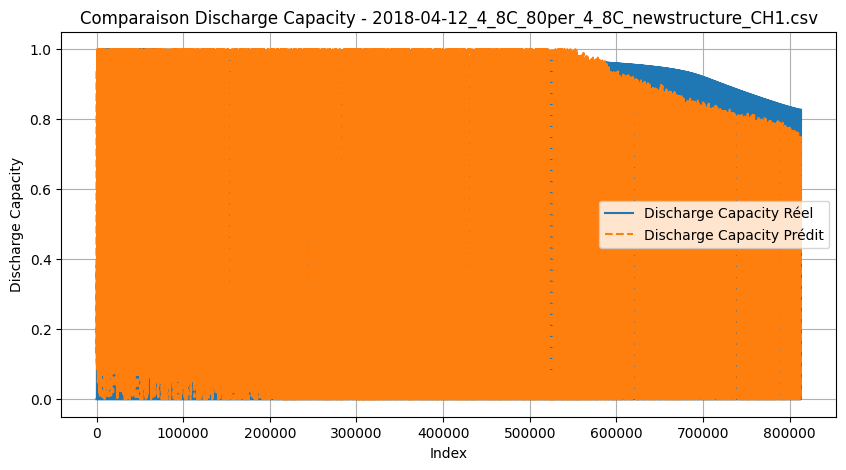

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


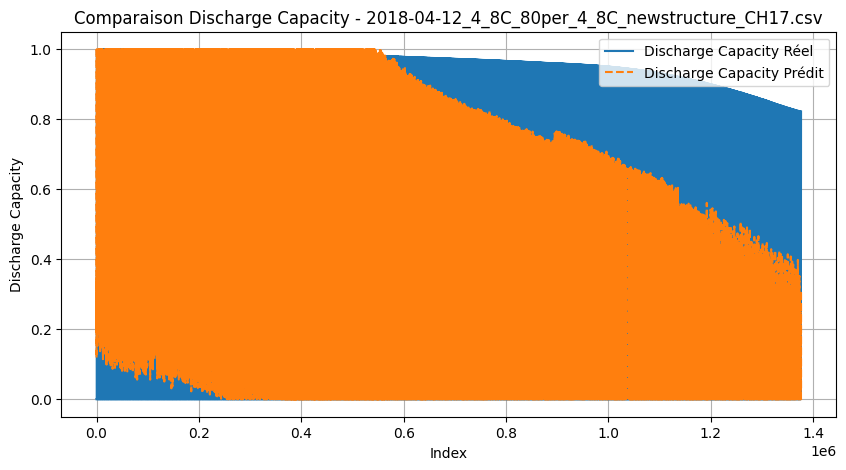

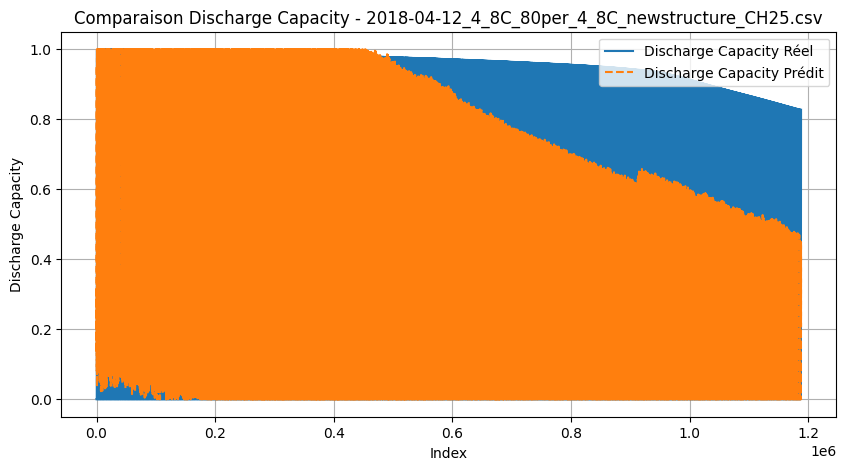

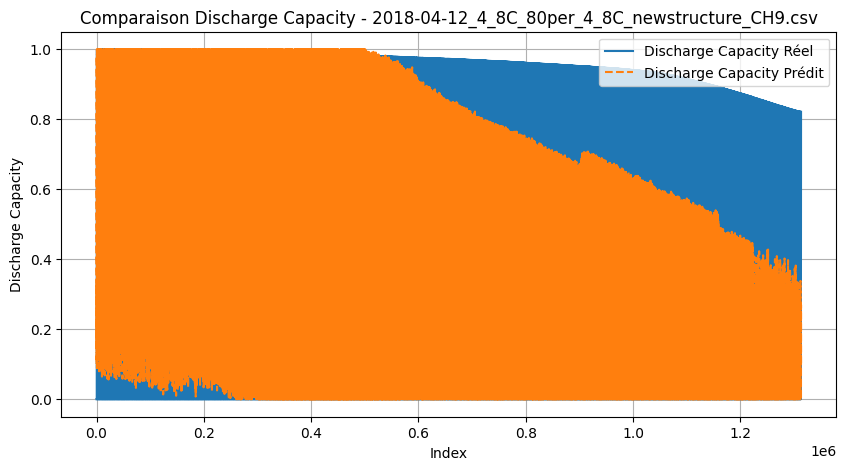

MSE moyen sur l'ensemble d'entraînement: 0.022530259444485137
MSE moyen sur l'ensemble de test: 0.05521036314662512


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous  fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser les listes pour stocker les résultats de la régression
train_mse_list = []
test_mse_list = []

# Sélectionner les fichiers pour l'entraînement et le test
train_files = csv_files[:12]  # Les 12 premiers fichiers pour l'entraînement
test_files = csv_files[12:]   # Les 5 derniers fichiers pour le test

# Entraîner le modèle sur les fichiers d'entraînement
for csv_file in train_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    X_train = df.drop(columns=['Discharge_Capacity'])
    y_train = df['Discharge_Capacity']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_list.append(train_mse)

# Tester le modèle sur les fichiers de test
for csv_file in test_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    X_test = df.drop(columns=['Discharge_Capacity'])
    y_test = df['Discharge_Capacity']
    
    # Prédire sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    
    # Contraindre les prédictions à être dans l'intervalle [0, 1]
    y_test_pred = np.clip(y_test_pred, 0, 1)
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_list.append(test_mse)
    
    # Tracer le graphique pour comparer les valeurs réelles et prédites
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Discharge Capacity Réel')
    plt.plot(y_test_pred, label='Discharge Capacity Prédit', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Discharge Capacity')
    plt.title(f'Comparaison Discharge Capacity - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Afficher les MSE moyens pour l'entraînement et le test
print(f'MSE moyen sur l\'ensemble d\'entraînement: {sum(train_mse_list)/len(train_mse_list)}')
print(f'MSE moyen sur l\'ensemble de test: {sum(test_mse_list)/len(test_mse_list)}')


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pytorch_tabular import TabularModel
from pytorch_tabular.models import TabTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from sklearn.metrics import mean_squared_error

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser les listes pour stocker les résultats de la régression
train_mse_list = []
test_mse_list = []

# Sélectionner les fichiers pour l'entraînement et le test
train_files = csv_files[:12]  # Les 12 premiers fichiers pour l'entraînement
test_files = csv_files[12:]   # Les 5 derniers fichiers pour le test

# Entraîner et tester le modèle indépendamment sur chaque fichier
for csv_file in train_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    # Diviser les données en X et y
    X_train = df.drop(columns=['Discharge_Capacity'])
    y_train = df['Discharge_Capacity']
    
    # Configuration des données pour TabTransformer
    data_config = DataConfig(
        target=['Discharge_Capacity'],
        continuous_cols=X_train.columns.tolist(),
    )
    
    # Configuration du modèle TabTransformer
    model_config = TabTransformerConfig(
        task="regression",
        metrics=["mean_squared_error"],
    )
    
    # Configuration de l'entraîneur
    trainer_config = TrainerConfig(
        max_epochs=100,
        # Pas de GPU nécessaire
    )
    
    optimizer_config = OptimizerConfig()

    # Créer et entraîner le modèle TabTransformer
    model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    # Entraînement du modèle sur chaque fichier
    model.fit(train=df)

    # Prédire sur les données d'entraînement
    predictions_train = model.predict(df)
    
    # Calculer le MSE sur l'ensemble d'entraînement
    train_mse = mean_squared_error(y_train, predictions_train['prediction'])
    train_mse_list.append(train_mse)

# Tester le modèle sur les fichiers de test
for csv_file in test_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    X_test = df.drop(columns=['Discharge_Capacity'])
    y_test = df['Discharge_Capacity']
    
    # Prédire sur l'ensemble de test
    predictions_test = model.predict(df)
    
    # Calculer le MSE sur l'ensemble de test
    test_mse = mean_squared_error(y_test, predictions_test['prediction'])
    test_mse_list.append(test_mse)
    
    # Tracer le graphique pour comparer les valeurs réelles et prédites
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Discharge Capacity Réel')
    plt.plot(predictions_test['prediction'].values, label='Discharge Capacity Prédit', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Discharge Capacity')
    plt.title(f'Comparaison Discharge Capacity - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Afficher les MSE moyens pour l'entraînement et le test
print(f'MSE moyen sur l\'ensemble d\'entraînement: {sum(train_mse_list)/len(train_mse_list)}')
print(f'MSE moyen sur l\'ensemble de test: {sum(test_mse_list)/len(test_mse_list)}')


2024-09-08 23:42:36,878 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-09-08 23:42:36,950 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-09-08 23:42:37,005 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-09-08 23:42:38,305 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: TabTransformerModel

2024-09-08 23:42:38,412 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-09-08 23:42:38,469 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

Missing logger folder: c:\Users\pc\Desktop\PHM-Batteries\lightning_logs


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │
│ 2 │ _head            │ LinearHead             │      8 │
│ 3 │ loss             │ MSELoss                │      0 │
└───┴──────────────────┴────────────────────────┴────────┘

Trainable params: 271 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 271 K                                                                                                
Total estimated model params size (MB): 1

Output()